In [1]:
from cryptocmd import CmcScraper
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

# <b>Calculate log return (Volatility) of BTC </b>

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

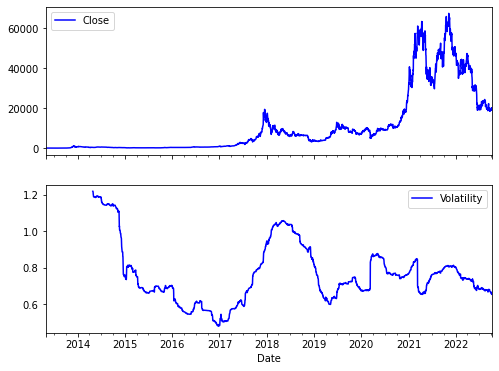

In [2]:
scaper = CmcScraper("BTC", all_time=True, order_ascending=True)
btc_df = scaper.get_dataframe(date_as_index=True)

# Price difference = tomorrow's close price - today's close price
# Daily return = Price difference / today's close price 

btc_df['Log_Return'] = np.log(btc_df.Close) - np.log(btc_df.Close.shift(1))
"""
#? sigma_T = sigma \sqrt{T}
#? sigma_T	=	volatility over a time horizon
#? sigma	=	standard deviation of returns
#? T	=	number of periods in a time horizon
"""
time_frame = 365
btc_df['Volatility'] = btc_df.Log_Return.rolling(window=time_frame).std() * np.sqrt(time_frame)
btc_df[['Close', 'Volatility']].plot(subplots=True, color= 'b', figsize=(8,6))


# <b>Trading Algo with Moving Averages </b>

* Buy signal (go long)
the 61d trend is for the first time SD points above the 365d trend.

* Wait (park in cash)
the 61d trend is within a range of +/– SD points around the 365d trend.

* Sell signal (go short)
the 61d trend is for the first time SD points below the 365d trend.

<AxesSubplot: xlabel='Date'>

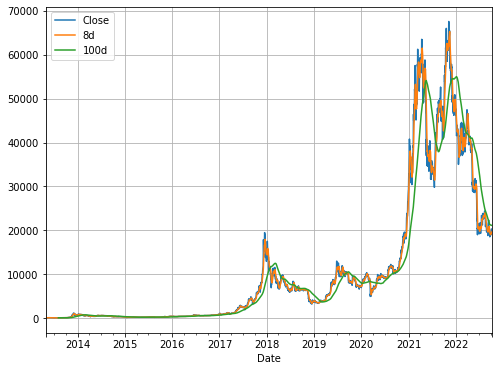

In [3]:
fast_ma = 8
slow_ma = 100
fast_ma_col = str(fast_ma)+ 'd'
slow_ma_col = str(slow_ma)+ 'd'
btc_df[fast_ma_col] =  np.round(btc_df.Close.rolling(window=fast_ma).mean(), 2)
btc_df[slow_ma_col] =  np.round(btc_df.Close.rolling(window=slow_ma).mean(), 2)

btc_df[['Close', fast_ma_col, slow_ma_col]].tail()
btc_df[['Close', fast_ma_col, slow_ma_col]].plot(grid=True, figsize=(8,6))


In [4]:
btc_df['MA_Diff'] = btc_df[fast_ma_col] - btc_df[slow_ma_col]
btc_df.tail()

,Open,High,Low,Close,Volume,Market Cap,Log_Return,Volatility,8d,100d,MA_Diff
Date,,,,,,,,,,,
2022-10-04,19623.584689,20380.344183,19523.840124,20336.842949,3.588728e+10,3.898433e+11,0.035702,0.660546,19482.34,21144.36,-1662.02
2022-10-05,20335.899579,20343.748520,19801.800661,20160.716172,3.322379e+10,3.864897e+11,-0.008698,0.658656,19613.61,21138.61,-1525.00
2022-10-06,20161.038438,20408.391840,19900.088533,19955.443672,3.471141e+10,3.825740e+11,-0.010234,0.654439,19679.70,21135.36,-1455.66
2022-10-07,19957.559080,20041.085580,19395.793240,19546.849710,2.922732e+10,3.747611e+11,-0.020688,0.654178,19676.43,21129.79,-1453.36
2022-10-08,19546.328838,19601.695455,19299.413619,19416.567850,1.643742e+10,3.722844e+11,-0.006687,0.654164,19674.53,21126.11,-1451.58


In [5]:
SD=50
btc_df['Regime'] = np.where(btc_df.MA_Diff > SD, 1, 0)
btc_df['Regime'] = np.where(btc_df.MA_Diff < -SD, -1, btc_df['Regime'])
btc_df.Regime.value_counts()

 1    1549
-1    1132
 0     770
Name: Regime, dtype: int64

In [6]:
btc_df

,Open,High,Low,Close,Volume,Market Cap,Log_Return,Volatility,8d,100d,MA_Diff,Regime
Date,,,,,,,,,,,,
2013-04-28,135.300003,135.979996,132.100006,134.210007,0.000000e+00,1.488567e+09,NaN,NaN,NaN,NaN,NaN,0
2013-04-29,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09,0.074150,NaN,NaN,NaN,NaN,0
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09,-0.039082,NaN,NaN,NaN,NaN,0
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09,-0.172385,NaN,NaN,NaN,NaN,0
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09,-0.106130,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04,19623.584689,20380.344183,19523.840124,20336.842949,3.588728e+10,3.898433e+11,0.035702,0.660546,19482.34,21144.36,-1662.02,-1
2022-10-05,20335.899579,20343.748520,19801.800661,20160.716172,3.322379e+10,3.864897e+11,-0.008698,0.658656,19613.61,21138.61,-1525.00,-1
2022-10-06,20161.038438,20408.391840,19900.088533,19955.443672,3.471141e+10,3.825740e+11,-0.010234,0.654439,19679.70,21135.36,-1455.66,-1


1 means long the market
0 means stay cash
-1 means short the market

(-1.1, 1.1)

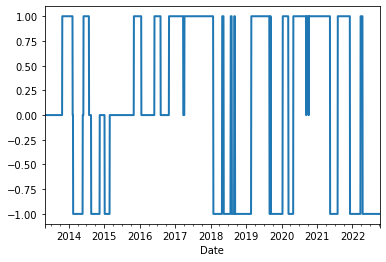

In [7]:
btc_df.Regime.plot(lw=2)
plt.ylim([-1.1, 1.1])

<AxesSubplot: xlabel='Date'>

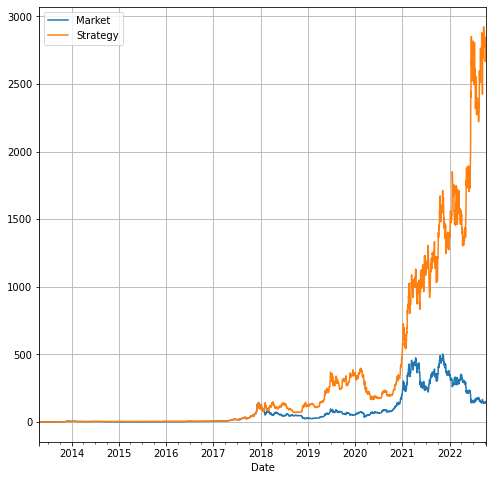

In [8]:
#Market daily return
btc_df['Market'] = np.log(btc_df.Close) - np.log(btc_df.Close.shift(1))

#Strategy daily return
btc_df['Strategy'] = btc_df.Regime.shift(1) * btc_df.Market

btc_df[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8,8))
